## Wind Power Generation Prediction

### Data
Source: https://dacon.io/competitions/official/236066/data
#### Train/Test Dataset
* Columns:
    * `id`: unique sample ID
    * `temperature` (°C)
    * `pressure` (hPa)
    * `humidity` (%)
    * `wind_speed` (m/s)
    * `wind_direction` (degree)
    * `precipitation` (1 hr, mm)
    * `snowing`: indicator whether it is snowing or not (False, True)
    * `cloudiness` (%)
    * `target`: wind power generated (GW), not included in test data

### Score Measures
* Evaluated with macro f1 score
* Public score: measured with 30% of the test data
* Private score: measured with the remaining 70% of the test data
    
### Final Scores
* public: 1.82965 (rank #9)
* private: 1.84272 (rank #10)

In [ ]:
! pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 KB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 KB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split

## Data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness,target
0,TRAIN_00000,27.8816,1013.6,46.8,2.4,232.4,0.00,False,0.0,1.180
1,TRAIN_00001,5.7540,1026.6,76.6,3.6,172.0,0.00,False,8.8,8.581
2,TRAIN_00002,20.8220,1016.2,64.8,2.2,206.0,0.06,False,23.0,3.978
3,TRAIN_00003,20.0758,1017.4,72.6,0.8,215.4,0.00,False,0.0,8.301
4,TRAIN_00004,7.5260,1023.2,82.8,1.2,158.0,0.00,False,15.0,1.692


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
 9   target          19275 non-null  float64
dtypes: bool(1), float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
train.isnull().sum()

id                0
temperature       0
pressure          0
humidity          0
wind_speed        0
wind_direction    0
precipitation     0
snowing           0
cloudiness        0
target            0
dtype: int64

In [ ]:
test.isnull().sum()

id                0
temperature       0
pressure          0
humidity          0
wind_speed        0
wind_direction    0
precipitation     0
snowing           0
cloudiness        0
dtype: int64

## EDA

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature,19275.0,17.288476,7.192604,-0.208137,11.712,16.530,22.5590,37.058
pressure,19275.0,1059.825712,2544.132430,812.600000,1012.600,1016.800,1021.0000,201373.000
humidity,19275.0,68.948763,14.856929,22.600000,57.800,70.800,80.8000,100.000
wind_speed,19275.0,2.476970,1.359942,0.000000,1.400,2.200,3.2000,29.800
wind_direction,19275.0,166.578179,57.313099,0.000000,127.000,166.600,208.0000,338.000
precipitation,19275.0,0.076572,0.193110,0.000000,0.000,0.000,0.0600,3.180
cloudiness,19275.0,25.749748,17.628612,0.000000,12.000,23.000,37.0000,93.600
target,19275.0,5.477028,3.217581,0.000000,2.956,4.837,7.4365,17.344


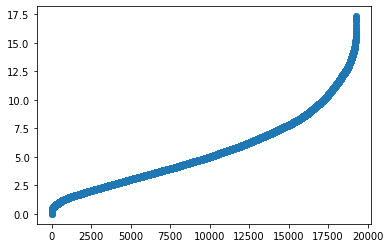

In [ ]:
plt.scatter(range(train.shape[0]), np.sort(train['target'].values))

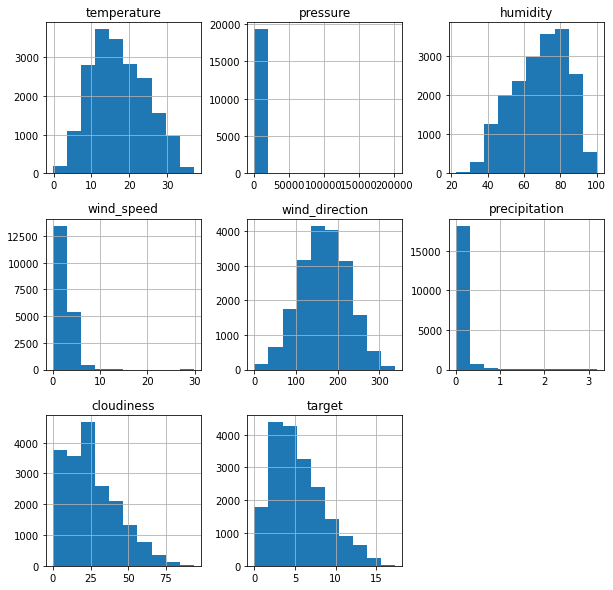

,feature,skewness,kurtosis
0,temperature,0.26,-0.65
1,pressure,76.07,5962.79
2,humidity,-0.33,-0.75
3,wind_speed,1.68,10.55
4,wind_direction,-0.04,-0.37
5,precipitation,6.73,68.66
6,cloudiness,0.70,0.10
7,target,0.77,-0.00


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train.hist(figsize=(10, 10))
plt.show()
l = []
for col in train.select_dtypes(include=numerics):
    skewness = round(train[col].skew(),2)
    kurtosis = round(train[col].kurt(),2)
    a = [col, skewness, kurtosis]
    l.append(a)
pd.DataFrame(l, columns = ['feature', 'skewness', 'kurtosis'])

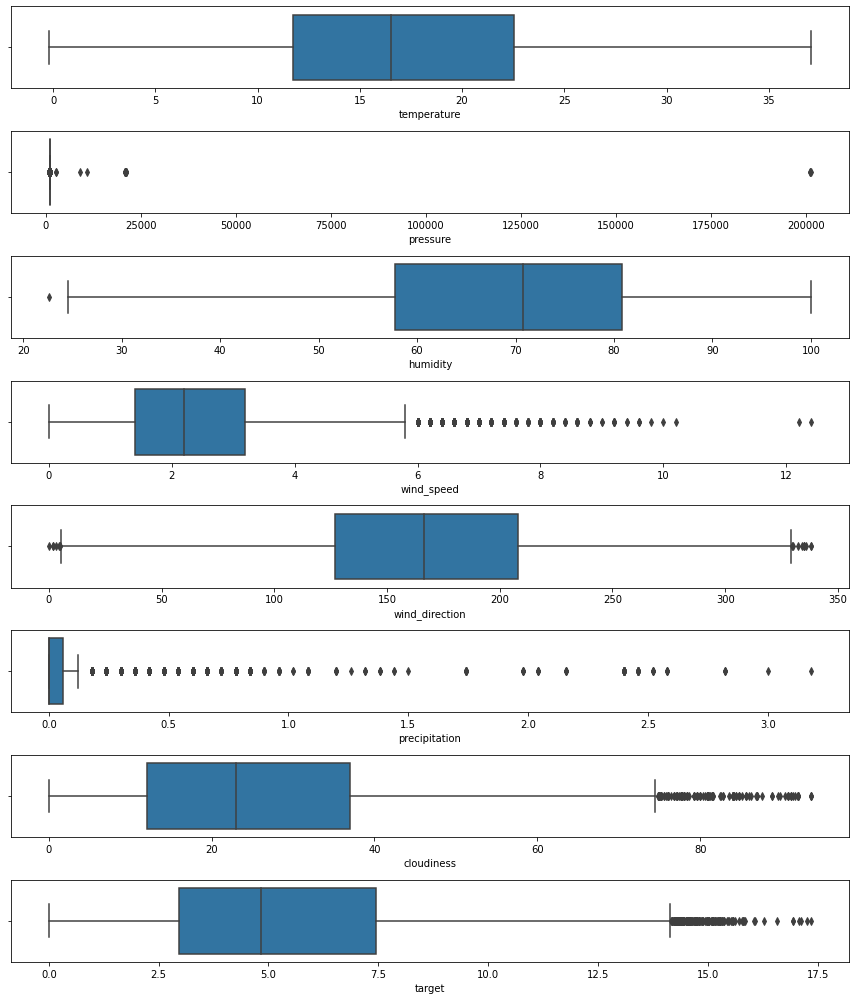

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = train.select_dtypes(include=numerics)
fig, axes = plt.subplots(nrows = len(num_cols.columns), figsize = (12, 14))
for col, ax in zip(num_cols, axes.flat):
    sns.boxplot(data = train, x = col, ax = ax)
fig.tight_layout()


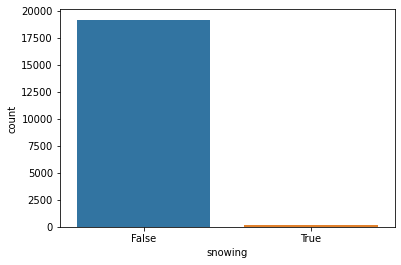

In [ ]:
sns.countplot(data = train, x = 'snowing')

In [ ]:
display(train.groupby('snowing').mean())

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness,target
snowing,,,,,,,,
False,17.359732,1060.196261,68.936031,2.470339,166.310131,0.075048,25.653943,5.478660
True,6.372144,1003.057600,70.899200,3.492800,207.643200,0.310080,40.427200,5.226992


In [ ]:
# determine if the difference of mean between snowing=True&False is statistically significant
import scipy.stats

snowing_false = train[train['snowing']==False]['target'].values
snowing_true = train[train['snowing']==True]['target'].values

scipy.stats.ttest_ind(snowing_false, snowing_true, equal_var=False)

Ttest_indResult(statistic=0.9873546844734775, pvalue=0.3253596358094196)

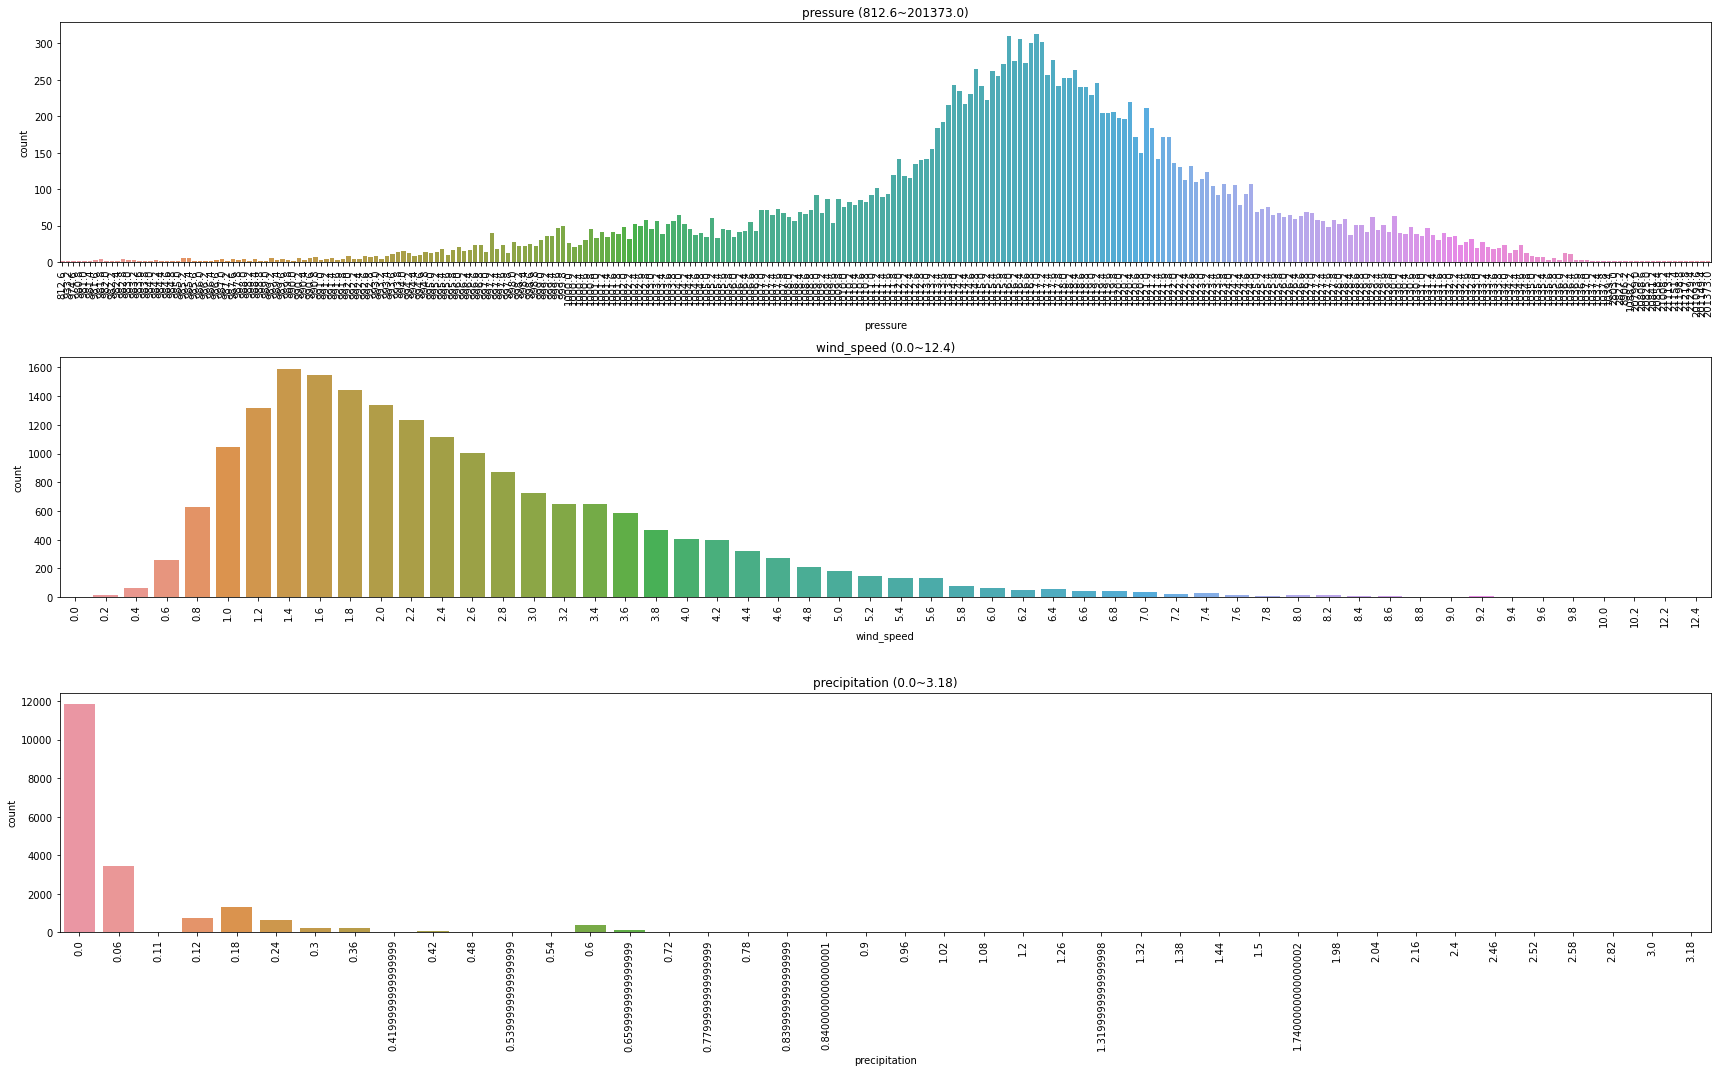

In [ ]:
cols = ['pressure', 'wind_speed', 'precipitation']
fig, axes = plt.subplots(nrows = len(cols), figsize = (24, 5*len(cols)))
for col, ax in zip(cols, axes.flat):
    plt.sca(ax)
    plt.xticks(rotation=90)
    min_val = min(train[col])
    max_val = max(train[col])
    ax.set(title = f'{col} ({min_val}~{max_val})')
    sns.countplot(data = train, x = col, ax = ax)

fig.tight_layout()

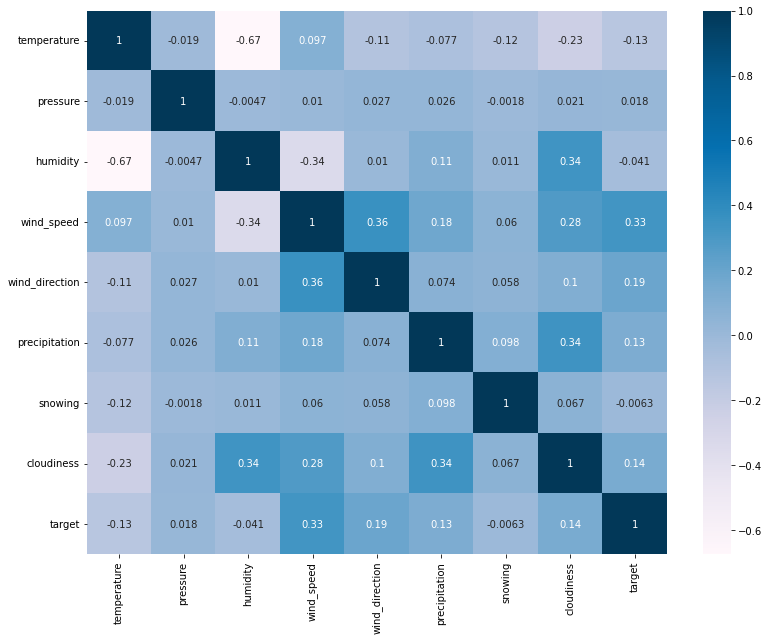

In [ ]:
plt.figure(figsize = (13, 10))
colormap = plt.cm.PuBu
sns.heatmap(train.corr(), annot = True, cmap = colormap)
plt.show()

* outliers in pressure, windspeed, precipitation
* the difference of mean between snowing=True&False is statistically insignificant
* pressure & snowing show low correlation to the target

## Preprocessing

In [ ]:
# delete outliers

print(f"Before: {train.shape}")
# train = train[(train['pressure'] <= 2000) & (train['pressure'] > 940)]
train = train[(train['wind_speed']< 20)]
# out_cols = ['pressure', 'wind_speed']
# for col in out_cols:
#   Q1 = train[col].quantile(0.25)
#   Q3 = train[col].quantile(0.75)
#   IQR = Q3 - Q1    #IQR is interquartile range. 

#   filter = (train[col] >= Q1 - 1.5 * IQR) & (train[col] <= Q3 + 1.5 *IQR)
#   train = train.loc[filter]  
print(f"After: {train.shape}")

Before: (19275, 10)
After: (19274, 10)


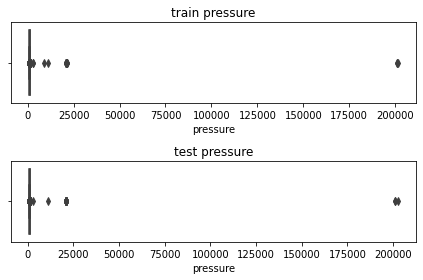

In [ ]:
fig, axes = plt.subplots(nrows=2)
sns.boxplot(data = train, x = 'pressure', ax=axes[0])
axes[0].set_title("train pressure")
sns.boxplot(data = test, x = 'pressure', ax=axes[1])
axes[1].set_title("test pressure")
fig.tight_layout()
plt.show()

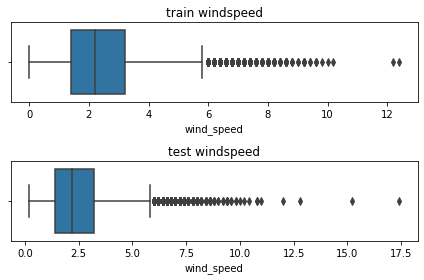

In [ ]:
fig, axes = plt.subplots(nrows=2)
sns.boxplot(data = train, x = 'wind_speed', ax=axes[0])
axes[0].set_title("train windspeed")
sns.boxplot(data = test, x = 'wind_speed', ax=axes[1])
axes[1].set_title("test windspeed")
fig.tight_layout()
plt.show()

In [ ]:
# snowing dummy variables
# train = pd.get_dummies(train, columns=['snowing'])
# test = pd.get_dummies(test, columns=['snowing'])

# target_val = train['target']
# train.drop('target', axis=1, inplace=True)
# train['target'] = target_val

In [ ]:
# multicollinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
traindf = train.select_dtypes(include=numerics)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    traindf.values, i) for i in range(traindf.shape[1])]
vif["numeric features"] = traindf.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif


,VIF Factor,numeric features
0,11.773572,humidity
1,10.960169,wind_direction
2,4.844822,wind_speed
3,4.676083,cloudiness
4,4.575988,temperature
5,4.334624,target
6,1.757990,precipitation
7,1.172183,pressure


In [ ]:
# for reference
traindf = train.select_dtypes(include=numerics).drop(['wind_direction'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    traindf.values, i) for i in range(traindf.shape[1])]
vif["numeric features"] = traindf.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,numeric features
0,7.367865,humidity
1,5.520820,wind_speed
2,4.594173,temperature
3,4.524485,cloudiness
4,4.367626,target
5,1.320886,precipitation
6,1.171061,pressure


In [ ]:
#drop columns

#drop_columns = ['id', 'snowing', 'pressure']
drop_columns = ['id', 'snowing']
#drop_columns = ['id', 'wind_direction', 'snowing']
#drop_columns = ['id']
train = train.drop(drop_columns, axis = 1)
test = test.drop(drop_columns, axis = 1)

# train['snowing'] =train['snowing'].map(lambda x: 1 if x==True else 0)
# test['snowing'] =test['snowing'].map(lambda x: 1 if x==True else 0)

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
x = train.drop('target', axis=1)
scaler = StandardScaler()
#scaler = Normalizer()
X_train_scaled = scaler.fit_transform(x)
X_test_scaled = scaler.transform(test)

train.loc[:,:-1] = X_train_scaled
test.loc[:,:] = X_test_scaled

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  ):


## 모델 정의 및 학습

### AutoGluon

* Performed numerous experiments with AutoGluon using provided data. Since I worked in a Colab environment, the maximum time allowed for training was 3 hours
    * delete snowing col, get rid of 1 major outlier in pressure > best performance
    * use all cols & values, change snowing to binary var
    * delete wind direction and snowing
    * log transform highly skewed variables, drop snowing & pressure
    * use snowing as dummy variables

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = TabularDataset(train)
test_data = TabularDataset(test)

In [ ]:
label = 'target'
eval_metric = 'mean_absolute_error'
time_limit = 3600*3 # limit training time to 3 hrs

In [ ]:
predictor = TabularPredictor(
    label=label,
    eval_metric=eval_metric
).fit(train_data, auto_stack= True, presets='best_quality', time_limit=time_limit)
# setting auto_stack=True allows AutoGluon to automatically determine the best parameters for bagging&stacking

No path specified. Models will be saved in: "AutogluonModels/ag-20230225_100154/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 10800s
AutoGluon will save models to "AutogluonModels/ag-20230225_100154/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    19274
Train Data Columns: 9
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (17.344, 0.0, 5.47686, 3.21758)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Usi

In [ ]:
predictor.leaderboard(silent = True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-1.835252,461.249548,11376.241162,0.001002,0.920076,3,True,22
1,NeuralNetTorch_BAG_L2,-1.836335,450.868209,9383.448956,3.855416,2092.667105,2,True,20
2,NeuralNetFastAI_BAG_L2,-1.856861,454.907571,9147.677492,7.894778,1856.895641,2,True,18
3,XGBoost_BAG_L2,-1.869224,448.932349,7589.399260,1.919555,298.617409,2,True,19
4,CatBoost_BAG_L2,-1.870294,447.624124,7881.888082,0.611331,591.106232,2,True,16
5,LightGBM_BAG_L2,-1.870384,451.471537,7581.601088,4.458744,290.819237,2,True,14
6,LightGBMXT_BAG_L2,-1.871373,454.730949,7608.971546,7.718156,318.189695,2,True,13
7,LightGBMLarge_BAG_L2,-1.873636,453.782311,7791.433186,6.769518,500.651335,2,True,21
8,ExtraTreesMSE_BAG_L2,-1.895713,448.232694,7313.751678,1.219901,22.969828,2,True,17
9,WeightedEnsemble_L2,-1.897954,219.997420,2626.383609,0.001352,0.874249,2,True,12


In [ ]:
predictor.save()

In [ ]:
model_to_use = predictor.get_model_best()
model_pred = predictor.predict(test_data, model=model_to_use)

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['target'] = model_pred
submission

,id,target
0,TEST_00000,4.788704
1,TEST_00001,4.916087
2,TEST_00002,7.034368
3,TEST_00003,4.407692
4,TEST_00004,4.648366
...,...,...
19270,TEST_19270,3.295273
19271,TEST_19271,4.407344
19272,TEST_19272,2.787239
19273,TEST_19273,4.346372


In [ ]:
submission.to_csv('sub_autogluon_2.csv', index=False)

#### Takeaways
* AutoGluon provides a simple method for prediction with good results. It automatically goes through effective machine learning models to build the best model and works for other problems including classification, time series, images, and multimodal
* Possible ways to improve the score:
    * conduct research on wind power and consider more variables with feature engineering (ex. air density, absolute humidity, air pressure)
    * work in an environment that allows longer training time
